# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнил студент гр. 9381 Игнашов Вадим, вариант 5.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при 𝑡 → +∞.

## Основные теоретические положения

**Система линейных ОДУ с периодическими коэффициентами** - система вида

$X'=A(t)X, A(t+T)=A(t), t\ge 0$

,где:

$X'=(x_1',...,x_n')^T$,

$X=(x_1,...,x_n)^T$,

$A(t)=||a_{ij}(t)||$, $a_{ij}(t+T)=a_{ij}(t)$

$T>0$ - период коэффициентов системы

**Фундаментальная матрица такой системы** - матрица $\phi(t)$, у которой столбцы являются линейно независимыми
решениями системы.

$\phi'=A(t)\phi$

**Основная матрица** для $\phi(t)$ - матрица $C$, такая, что

$\phi(t+T)=\phi(t)C, \forall t \ge 0$

**Спектральный радиус матрицы** $C$ - число $r(C)$, такое, что

$r(C) = \underset{i} \max{|\lambda_i|}$, где $i$ - собственные значения $C$

## Постановка задачи

Дано дифференциальное уравнение:

$x''+a(p,t)x=0$,

$a(p,t)=p+b(t)$,

$b(t+T)=b(t)$,

где $p$ - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$\begin{equation*}
 \begin{cases}
   u_1'=u_2\\
   u_2'=-a(p,t)u_1
 \end{cases}
\end{equation*}
(1)
$

Здесь $u_1(t)=x(t), u_2(t)=x'(t)$

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной
периодической системе, а не только к системе вида (1).

## Выполнение работы

**Вариант №5**

Функция: $b(t)=\frac{1}{(2+\sin{2t})}$

Подключим необходимые библиотеки, объявим переменную T и определим функции $a(p,t)$ и $b(t)$:

In [100]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import math

T=(math.pi/2)*6
step=0.001

def a(p, t):
    return p+b(t)
def b(t):
    return 1/(2+math.sin(2*t))

Отобразим график функции $b(t)$:

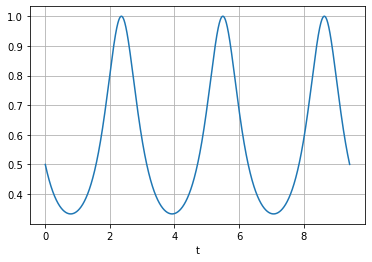

In [101]:
x = np.arange(0, T, step)
y = [b(i) for i in x]

plt.plot(x,y)
plt.xlabel("t")
plt.grid(True)
plt.show()

Определяем функцию системы уравнений, массив значений $p$ и начальные вектора $V_1=(1,0)^T$ и $V_2=(0,1)^T$. Объявляем
переменную для спектральных радиусов

In [102]:
def sys1(u, t):
    return [u[1],-1*a(p,t)*u[0]]

p_arr=np.arange(0,10,step)

v1 = [1, 0]
v2 = [0, 1]

spectral = []

Для каждого $p$ находим фундаментальную матрицу, при $t=T$. Для этого решаем две задачи
Коши с начальными векторами $V_1$ и $V_2$ на отрезке $[0,T]$, решением которых будут являться
вектор-функции $U(t,V_1)$ и $U(t,V_2)$ - столбцы $\phi(t)$

После чего находим основную матрицу для $C$ и ее спектральный радиус - $r(C) = \underset{i} \max{|\lambda_i|}$.

In [103]:
t_arr=np.arange(0,T,step)
for p in p_arr:
    utv1 = integrate.odeint(sys1,v1,t_arr)
    utv2 = integrate.odeint(sys1,v2,t_arr)
    C=np.array([
        [utv1[-1][0],utv2[-1][0]],
        [utv1[-1][1],utv2[-1][1]]
                ])
    spectral.append(max(abs(np.linalg.eigvals(C))))

Отобразим полученный график спектрального радиуса:

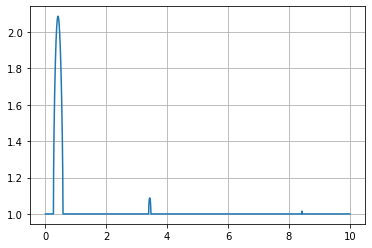

In [104]:
plt.plot(p_arr,spectral)
plt.grid(True)
plt.show()

Из полученного графика можем определить точку $p_0$, разделяющую зоны устойчивости и неустойчивости
с точностью $\varepsilon=10^{-3}$.

$|r(p_0)-1|<\varepsilon$

Также, определим точку $p_1$, определяющую конец зоны неустойчивости

In [109]:
eps = 0.001
p_0 = -1
p_1 = -1
rp_0 = -1
rp_1 = -1
type = True
for i in range(0,len(spectral)-1):
    if (abs(spectral[-i-1]-1)>eps) and type:
        p_0 = p_arr[-i]
        rp_0 = spectral[-i]
        type=False
    if (abs(spectral[-i-1]-1)<=eps) and not type:
        p_1 = p_arr[-i-1]
        rp_1 = spectral[-i-1]
        break
print(f"p_0={p_0}\nr(p_0)={rp_0}")
print(f"p_1={p_1}\nr(p_1)={rp_1}")

p_0=8.436
r(p_0)=1.0000001542887065
p_1=8.416
r(p_1)=1.0000000318767541


Отобразим на имеющемся графике спектрального радиуса точки $p_0$ и $p_1$, а также отобразим часть графика $p \in [8; 8.5]$,
на котором точнее видно, что границы установлены корректно:

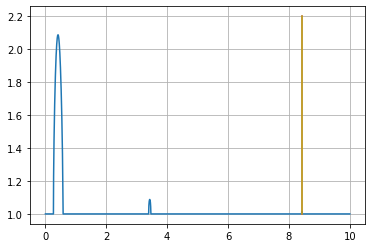

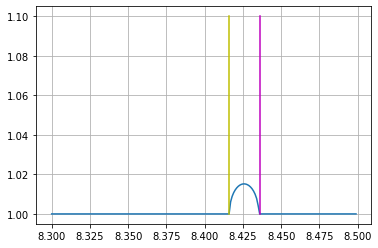

In [111]:
plt.plot(p_arr,spectral,[p_0, p_0],[1.0,2.2],'m',[p_1, p_1],[1.0,2.2],'y')
plt.grid(True)
plt.show()

plt.plot(p_arr[int(8.3/step):int(8.5/step)],spectral[int(8.3/step):int(8.5/step)],[p_0, p_0],[1.0,1.1],'m',[p_1, p_1],[1.0,1.1],'y')
plt.grid(True)
plt.show()

Аналогичным образом найдем все интервалы неустойчивости:

In [117]:
eps = 0.001
p_0 = []
p_1 = []
rp_1 = []
rp_0 = []
type = True
for i in range(0,len(spectral)-1):
    if (abs(spectral[-i-1]-1)>eps) and type:
        p_0.append(p_arr[-i])
        rp_0.append(spectral[-i])
        type=False
    if (abs(spectral[-i-1]-1)<=eps) and not type:
        p_1.append(p_arr[-i-1])
        rp_1.append(spectral[-i-1])
        type=True
for i in range(0,len(p_0)):
    print(f"p_0={p_0[i]}\nr(p_0)={rp_0[i]}")
    print(f"p_1={p_1[i]}\nr(p_1)={rp_1[i]}\n")

p_0=8.436
r(p_0)=1.0000001542887065
p_1=8.416
r(p_1)=1.0000000318767541

p_0=3.463
r(p_0)=1.0000000468040162
p_1=3.391
r(p_1)=1.0000000551069683

p_0=0.5760000000000001
r(p_0)=1.0000001389065516
p_1=0.263
r(p_1)=1.0000000081233043



Список интервалов неустойчивости:
* $(0.263; 0.576]$
* $(3.391; 3.463]$
* $(8.416; 8.436]$

На имеющемся графике спектрального радиуса на отрезке $p \in [0:10]$ явно видны интервалы (найденные выше), при которых $r(p)>1$. Они
определяют значения $p$, при которых по крайней мере часть решений системы не ограничена и система неустойчива.

Отобразим полученные интервалы на графике:

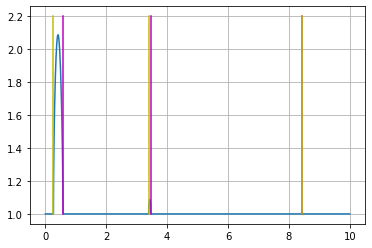

In [115]:
plt.plot(p_arr,spectral)
for i in range(0,len(p_0)):
    plt.plot([p_0[i], p_0[i]],[1.0,2.2],'m')
for i in range(0,len(p_1)):
    plt.plot([p_1[i], p_1[i]],[1.0,2.2],'y')
plt.grid(True)
plt.show()

## Выводы

В процессе выполнения практической работы была изучена усточивость системы линейных ОДУ с периодическими
коэффициентами при $t\rightarrow + \infty$

Были найдены границы зон устойчивости и неустойчивости.

Список интервалов:
* При $p \le 0.263$ - система устойчива
* При $p \in (0.263; 0.576]$ - система неустойчива
* При $p \in (0.576; 3.391]$ - система устойчива
* При $p \in (3.391; 3.463]$ - система неустойчива
* При $p \in (3.463; 8.416]$ - система устойчива
* При $p \in (8.416; 8.436]$ - система неустойчива
* При $p > 8.436$ - система устойчива

Значения $p_0$ были найдены с точностью $\varepsilon=10^{-3}$.

$|r(p_0)-1|<\varepsilon$